In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns


In [33]:
df = pd.read_csv("IMDB Dataset.csv")

In [34]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [36]:
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


In [37]:
print(df.duplicated().sum())
df = df.drop_duplicates()

418


In [38]:
df["sentiment"]=df['sentiment'].replace({"positive":0,"negative":1}).astype('int')

0    24884
1    24698
Name: sentiment, dtype: int64


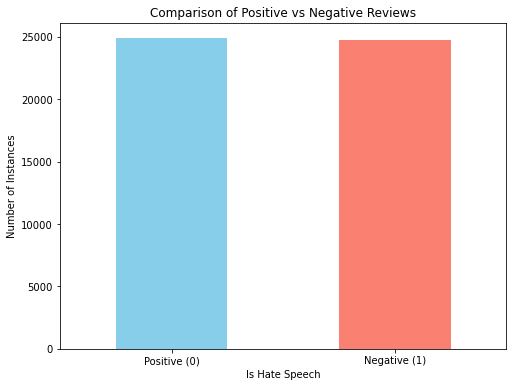

In [39]:
class_counts = df['sentiment'].value_counts()
print(class_counts)
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Comparison of Positive vs Negative Reviews')
plt.xlabel('Is Hate Speech')
plt.ylabel('Number of Instances')
plt.xticks(ticks=[0, 1], labels=['Positive (0)', 'Negative (1)'], rotation=0)
plt.show()

In [40]:
df["sentiment"]=df['sentiment'].replace({"positive":0,"negative":1}).astype('int')

In [41]:
df['clean_review'] = df['review'].str.lower()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        49582 non-null  object
 1   sentiment     49582 non-null  int32 
 2   clean_review  49582 non-null  object
dtypes: int32(1), object(2)
memory usage: 1.3+ MB


In [43]:
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,0,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,0,a wonderful little production. <br /><br />the...
2,I thought this was a wonderful way to spend ti...,0,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,1,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,"petter mattei's ""love in the time of money"" is..."


### Data Cleaning

In [44]:
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df = df[df['clean_review'].apply(is_english)]

In [49]:
def remove_urls_mentions_hashtags(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['clean_review'] = df['clean_review'].apply(remove_urls_mentions_hashtags)

In [51]:
import contractions

def expand_contractions(text):
    expanded_words = [contractions.fix(word) for word in text.split()]
    expanded_text = ' '.join(expanded_words)
    return expanded_text

df['clean_review'] = df['clean_review'].apply(expand_contractions)

In [52]:
import string
def remove_noise(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    return text

df['clean_review'] = df['clean_review'].apply(remove_noise)

#### Tokenization: Tokenize the text data into words or subword units (tokens). This step is often done during data preprocessing but is fundamental to feature engineering.

In [57]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df['clean_review'] = df['clean_review'].astype(str)

df['tokens'] = df['clean_review'].apply(tokenize_text)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,sentiment,clean_review,tokens
0,One of the other reviewers has mentioned that ...,0,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,0,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin..."
2,I thought this was a wonderful way to spend ti...,0,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,1,basically there is a family where a little boy...,"[basically, there, is, a, family, where, a, li..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon..."


Remove Common Stopwords: Depending on your analysis, you may want to remove common stopwords (e.g., “the,” “and,” “is”) to focus on more meaningful content.

In [58]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatization: Use lemmatization to reduce words to their base or dictionary form.

In [64]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['tokens'] = df['tokens'].apply(lemmatize_tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
df['clean_review'] = df['tokens'].apply(lambda x: ' '.join(x))

### EDA

Text Length Analysis
Text Length Distribution: Calculate and plot the distribution of text lengths.

Compare Text Length: Compare the text length distribution between hate speech and non-hate speech.

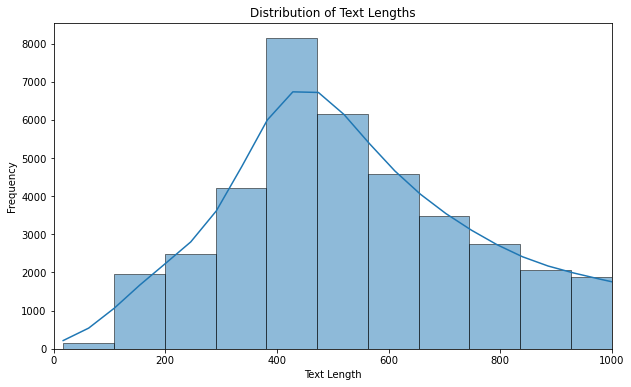

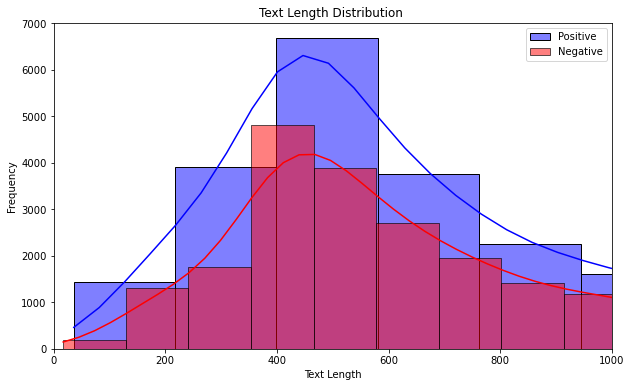

In [69]:
df['text_length'] = df['clean_review'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=100, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df[df['sentiment'] == 0]['text_length'], bins=50, color='blue', label='Positive', kde=True)
sns.histplot(df[df['sentiment'] == 1]['text_length'], bins=50, color='red', label='Negative', kde=True)
plt.title('Text Length Distribution ')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0, 1000) 
plt.show()

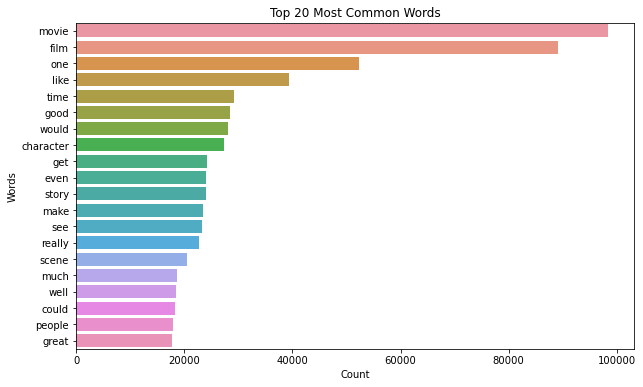

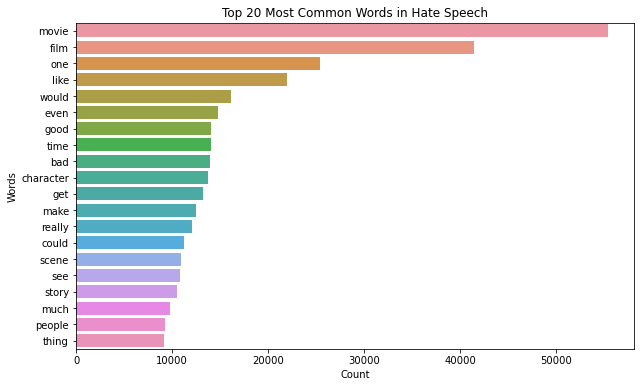

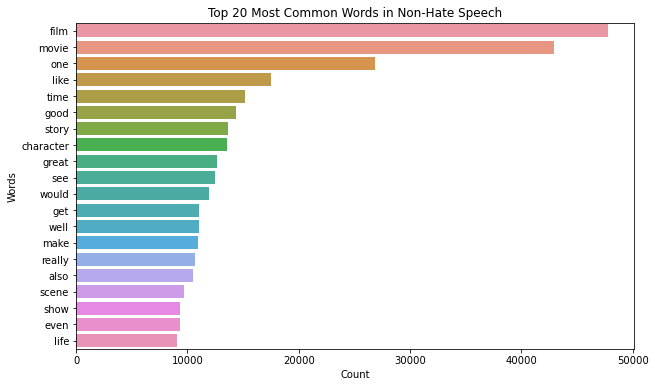

In [72]:
from collections import Counter

def word_frequencies(tokens):
    return Counter([word for token_list in tokens for word in token_list])


all_words = word_frequencies(df['tokens'])
common_words = all_words.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()


negatives = word_frequencies(df[df['sentiment'] == 1]['tokens'])
positives = word_frequencies(df[df['sentiment'] == 0]['tokens'])

common_negatives = negatives.most_common(20)
common_positives = positives.most_common(20)

negative_words, negative_counts = zip(*common_negatives)
positive_words, positive_counts = zip(*common_positives)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(negative_counts), y=list(negative_words))
plt.title('Top 20 Most Common Words in Hate Speech')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=list(positive_counts), y=list(positive_words))
plt.title('Top 20 Most Common Words in Non-Hate Speech')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

In [73]:
df.to_csv('IMDB_reviews_cleaned.csv', index=False)